## Problem 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset IV

In [145]:
n = 100
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 - 1

## Batch steepest gradient method

In [275]:
hp  = 0.2   # hyper parameter: lambda
itr = 50 # number of iteration

la, v = np.linalg.eigh(np.dot(x_d4.T, x_d4) + 8*hp*np.eye(4))
L = 0.25*np.max(la) # lipschitz constant

w = np.ones(3)

loss_sgm_history = []
w_sgm_history = []
loss = 0.

for t in range (1, itr+1):
    exp_t = 1 + np.exp(-y_d4 * (np.dot(w, x_d4[:,:-1].T) + x_d4[:,-1]))
    posterior = 1 / exp_t
    grad = 1 / n * np.sum(x_d4[:,:-1].T * y_d4 * (1 - posterior)) + 2 * hp * w
    loss = 1 / n * np.sum(np.log(exp_t)) + hp * (np.dot(w.T, w) + 1)
    w_sgm_history.append(w)
    loss_sgm_history.append(loss)
    w = w - 1 / L * grad

Text(0, 0.5, 'diff from the gold weight')

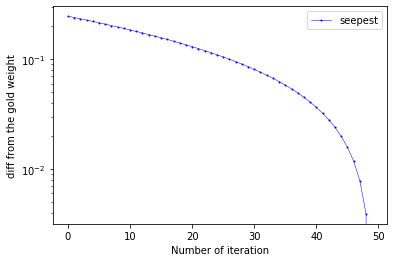

In [273]:
plt.plot(np.abs(np.array(loss_sgm_history) - loss), 'bo-', linewidth=0.5, markersize=1, label='seepest')
plt.legend()
plt.yscale('log')
plt.xlabel('Number of iteration')
plt.ylabel('diff from the gold weight')

## Newton based method